<h2 align="center">FIZ 437E</h2>
<h3 align="center">Statistical Learning from Data: Applications in Physics</h3>
<h3 align="center">Project Part I</h3>
<h4 align="center">Classification of Gamma and Hadron Particles using Shower Images Patterns Collected by Cherenkov MAGIC Telescope</h4>
<div align="center">
<br>
<img align = "center" src=" 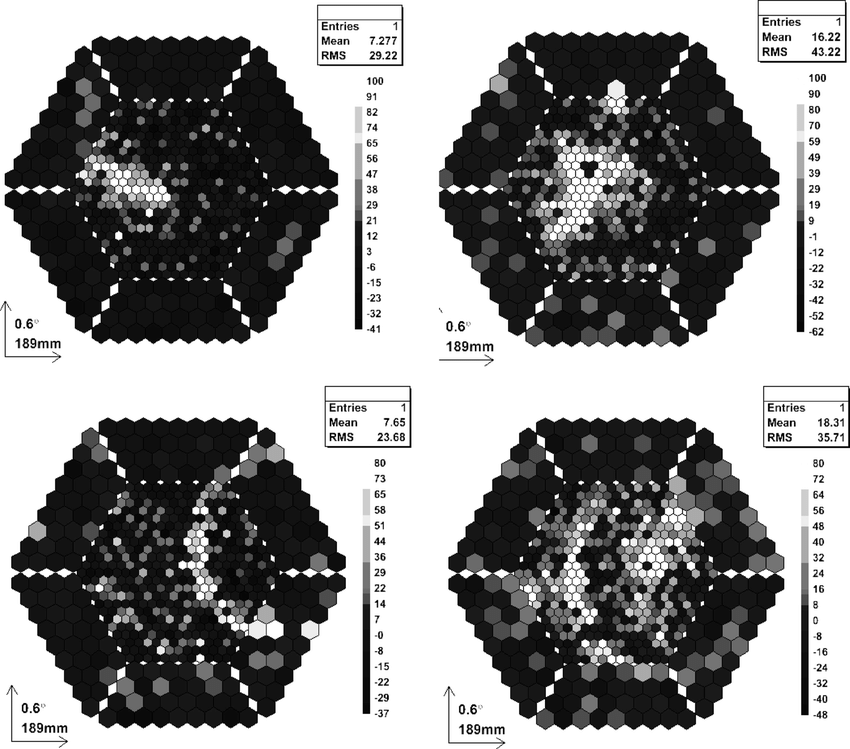
 " alt="Cherenkov Telescope" width="300" height="300">
    
</div>
<br>
<div style="text-align: left; padding-left: 15px; padding-right: 20px;">
    <p style="text-align: left;">
        Gökay Akçay <strong>090200147</strong>
        <br>
        Burak Berk Cihan <strong>090200161</strong>
        <br>
        Ege Tan Tüzüner <strong>090200131</strong>
         <br>
       Umut Kaya  <strong>090190149</strong>
    </p>
</div>

<br>

<div style="padding-left: 20px; padding-right: 20px;">
    <h2 align="center"><strong>Abstract</strong></h2>
    <hr>
    <p align="center">
           With the advancement of telescope systems and the increasing amount of data collected, 
        machine learning techniques in the astronomy field have become increasingly popular in 
        classifying astronomical objects. In that field, scientists use learning methods to classify 
        pulsars, neutron stars, types of suns, and black holes. In this project, the numerical data 
        obtained from images captured by Cherenkov telescopes, simulated by Monte Carlo 
        simulations, will be used to classify high-energy particles such as gamma rays and 
        cosmic rays. The data to be examined will include various numerical features such as the 
        highest pixel value, the distance from the center in millimeters for the relevant particle, 
        and the distribution of photons' wavelength onto the major and minor elliptical axes. These 
        data will be made meaningful and prepared for machine learning by using statistical 
        methods. The usage of four different algorithms CatBoost, Support Vector Machines, and Sequential Neural Networks on classification problems will be discussed, and
        will be used to predict 
        particle types.
    </p>
    <hr>
</div>

# Table of Contents

1. [Data Acquisition](#data-acquisition)
2. [Exploratory Data Analysis (EDA)](#data-exploration)
3. [Feature Engineering](#feature-engineering)
4. [Comparison of Machine Learning Algorithms and Model Selection](#comparison-of-machine-learning-algorithms)
5. [Hyperparameter Tuning](#hyperparameter-tuning)
6. [Conclusion](#conclusion)

### Importing Data <a name="data-acquisition"></a>

In [1]:
!pip install -q ucimlrepo

In [2]:
import warnings
from IPython.display import Image, display, HTML
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 

In [5]:
df = pd.concat((X,y),axis = 1)

df_hadron = df[df['class'] == 'h']
df_gamma = df[df['class'] == 'g']

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

- **fLength:** Major axis of the ellipse in millimeters.
- **fWidth:** Minor axis of the ellipse in millimeters.
- **fSize:** 10-log of the sum of content of all pixels, measured in #phot.
- **fConc:** Ratio of the sum of the two highest pixels over fSize.
- **fConc1:** Ratio of the highest pixel over fSize.
- **fAsym:** Distance from the highest pixel to the center, projected onto the major axis.
- **fM3Long:** 3rd root of the third moment along the major axis in millimeters.
- **fM3Trans:** 3rd root of the third moment along the minor axis in millimeters.
- **fAlpha:** Angle of the major axis with the vector to the origin in degrees.
- **fDist:** Distance from the origin to the center of the ellipse in millimeters.

In [7]:
# Converting particles into binary type
class_mapping = {'g': 0, 'h': 1}
df['class_mapped'] = df['class'].replace(class_mapping).astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fLength       19020 non-null  float64
 1   fWidth        19020 non-null  float64
 2   fSize         19020 non-null  float64
 3   fConc         19020 non-null  float64
 4   fConc1        19020 non-null  float64
 5   fAsym         19020 non-null  float64
 6   fM3Long       19020 non-null  float64
 7   fM3Trans      19020 non-null  float64
 8   fAlpha        19020 non-null  float64
 9   fDist         19020 non-null  float64
 10  class         19020 non-null  object 
 11  class_mapped  19020 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


In [9]:
df['class'].describe()

count     19020
unique        2
top           g
freq      12332
Name: class, dtype: object

In [10]:
numeric_features = list(df.select_dtypes(np.number).columns)
numeric_features
target_feature = 'class'

In [11]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.8*len(df))])

In [12]:
df_train_hadron = df_train[df_train['class'] == 'h']
df_train_gamma = df_train[df_train['class'] == 'g']

## EDA's and Plots  <a name="data-exploration"></a>

In [13]:
from scipy.stats import norm

#### Correlation of Features

<AxesSubplot: >

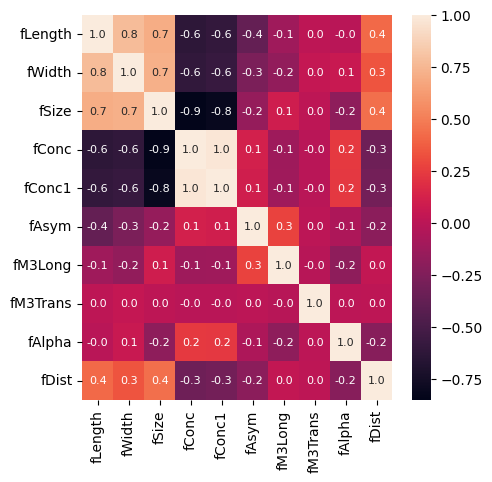

In [14]:
fig,axs = plt.subplots(figsize=(5,5))
sns.heatmap(df[numeric_features].corr(),annot = True,annot_kws = {"fontsize": 8},fmt = "0.1f")

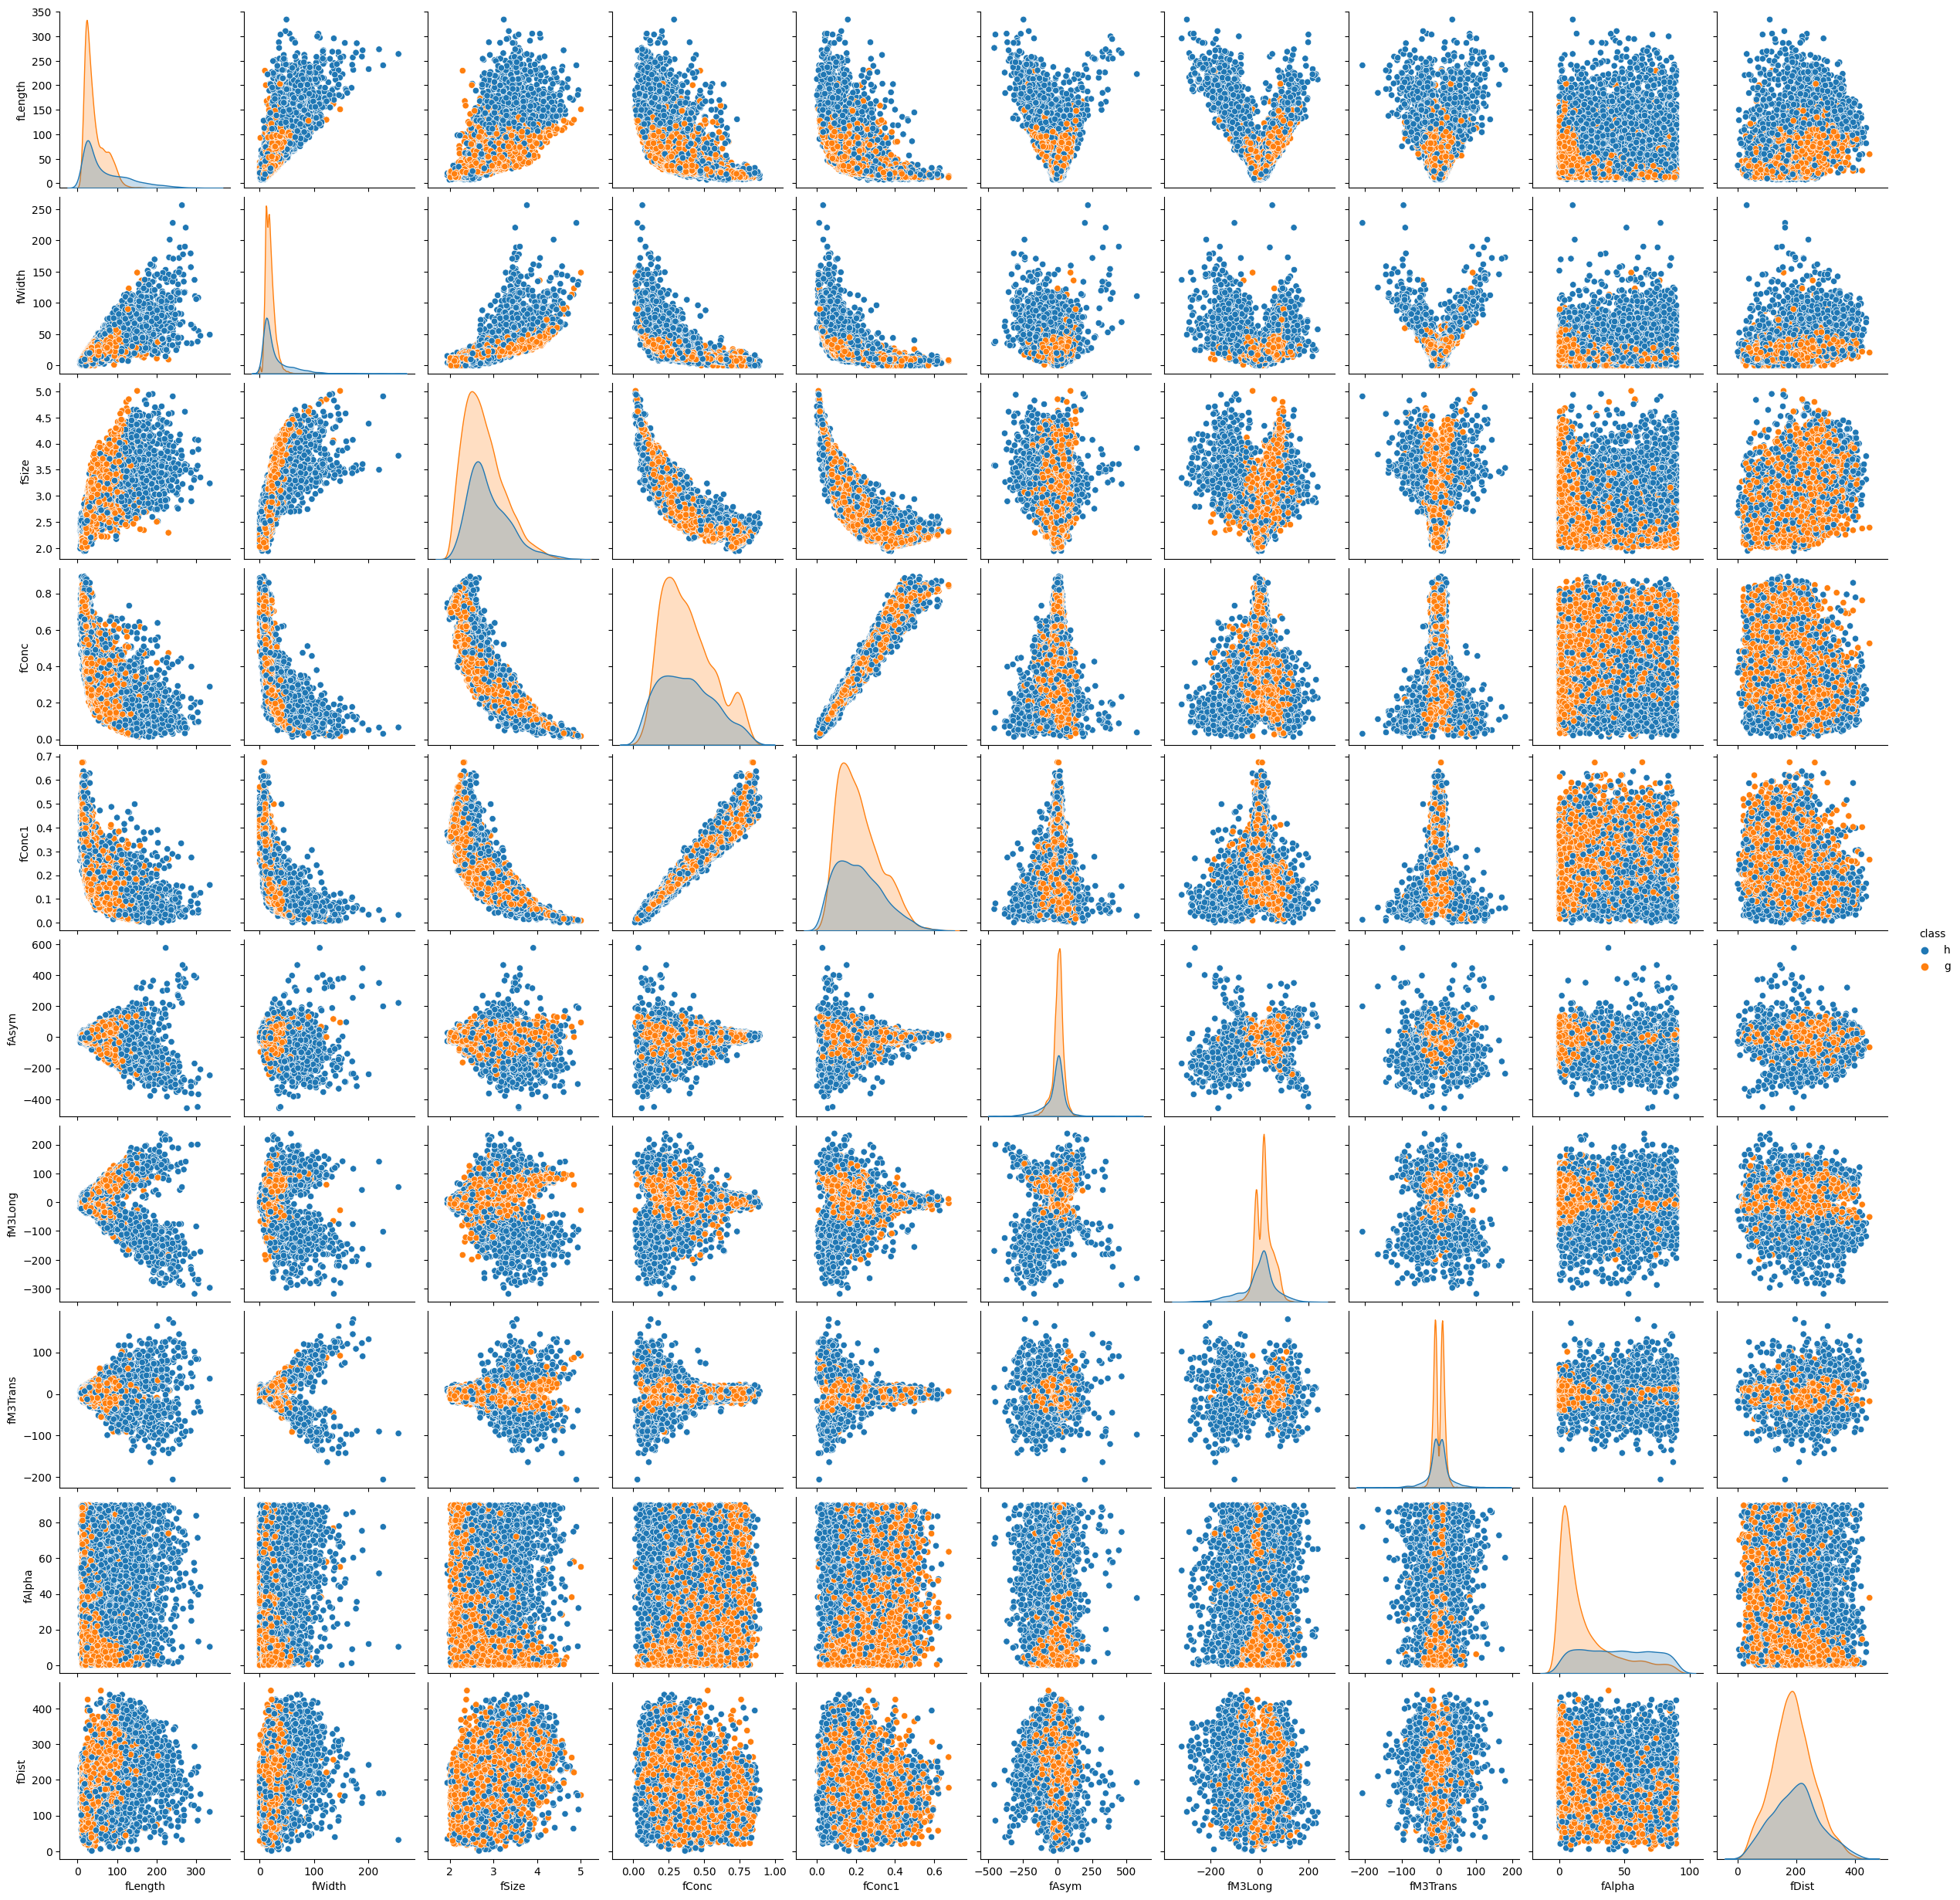

In [15]:
sns.pairplot(data = df_train[numeric_features+ ['class']],hue = 'class')

#### Particle Distributions

<AxesSubplot: xlabel='class', ylabel='Count'>

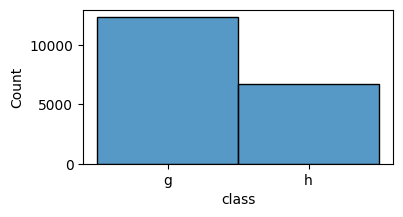

In [16]:
fig,axs = plt.subplots(figsize=(4,2))
sns.histplot(df['class'])

In our dataset, we have an unequal distribution of particle types, which can impact the accuracy of our model. When a dataset is imbalanced, meaning some classes have significantly fewer examples than others, a model trained on this data may be biased towards the majority class. As a result, it might struggle to correctly predict the minority classes. This problem can be solved through using different methods like oversampling.

#### Gaussian Distribution of Particle Features

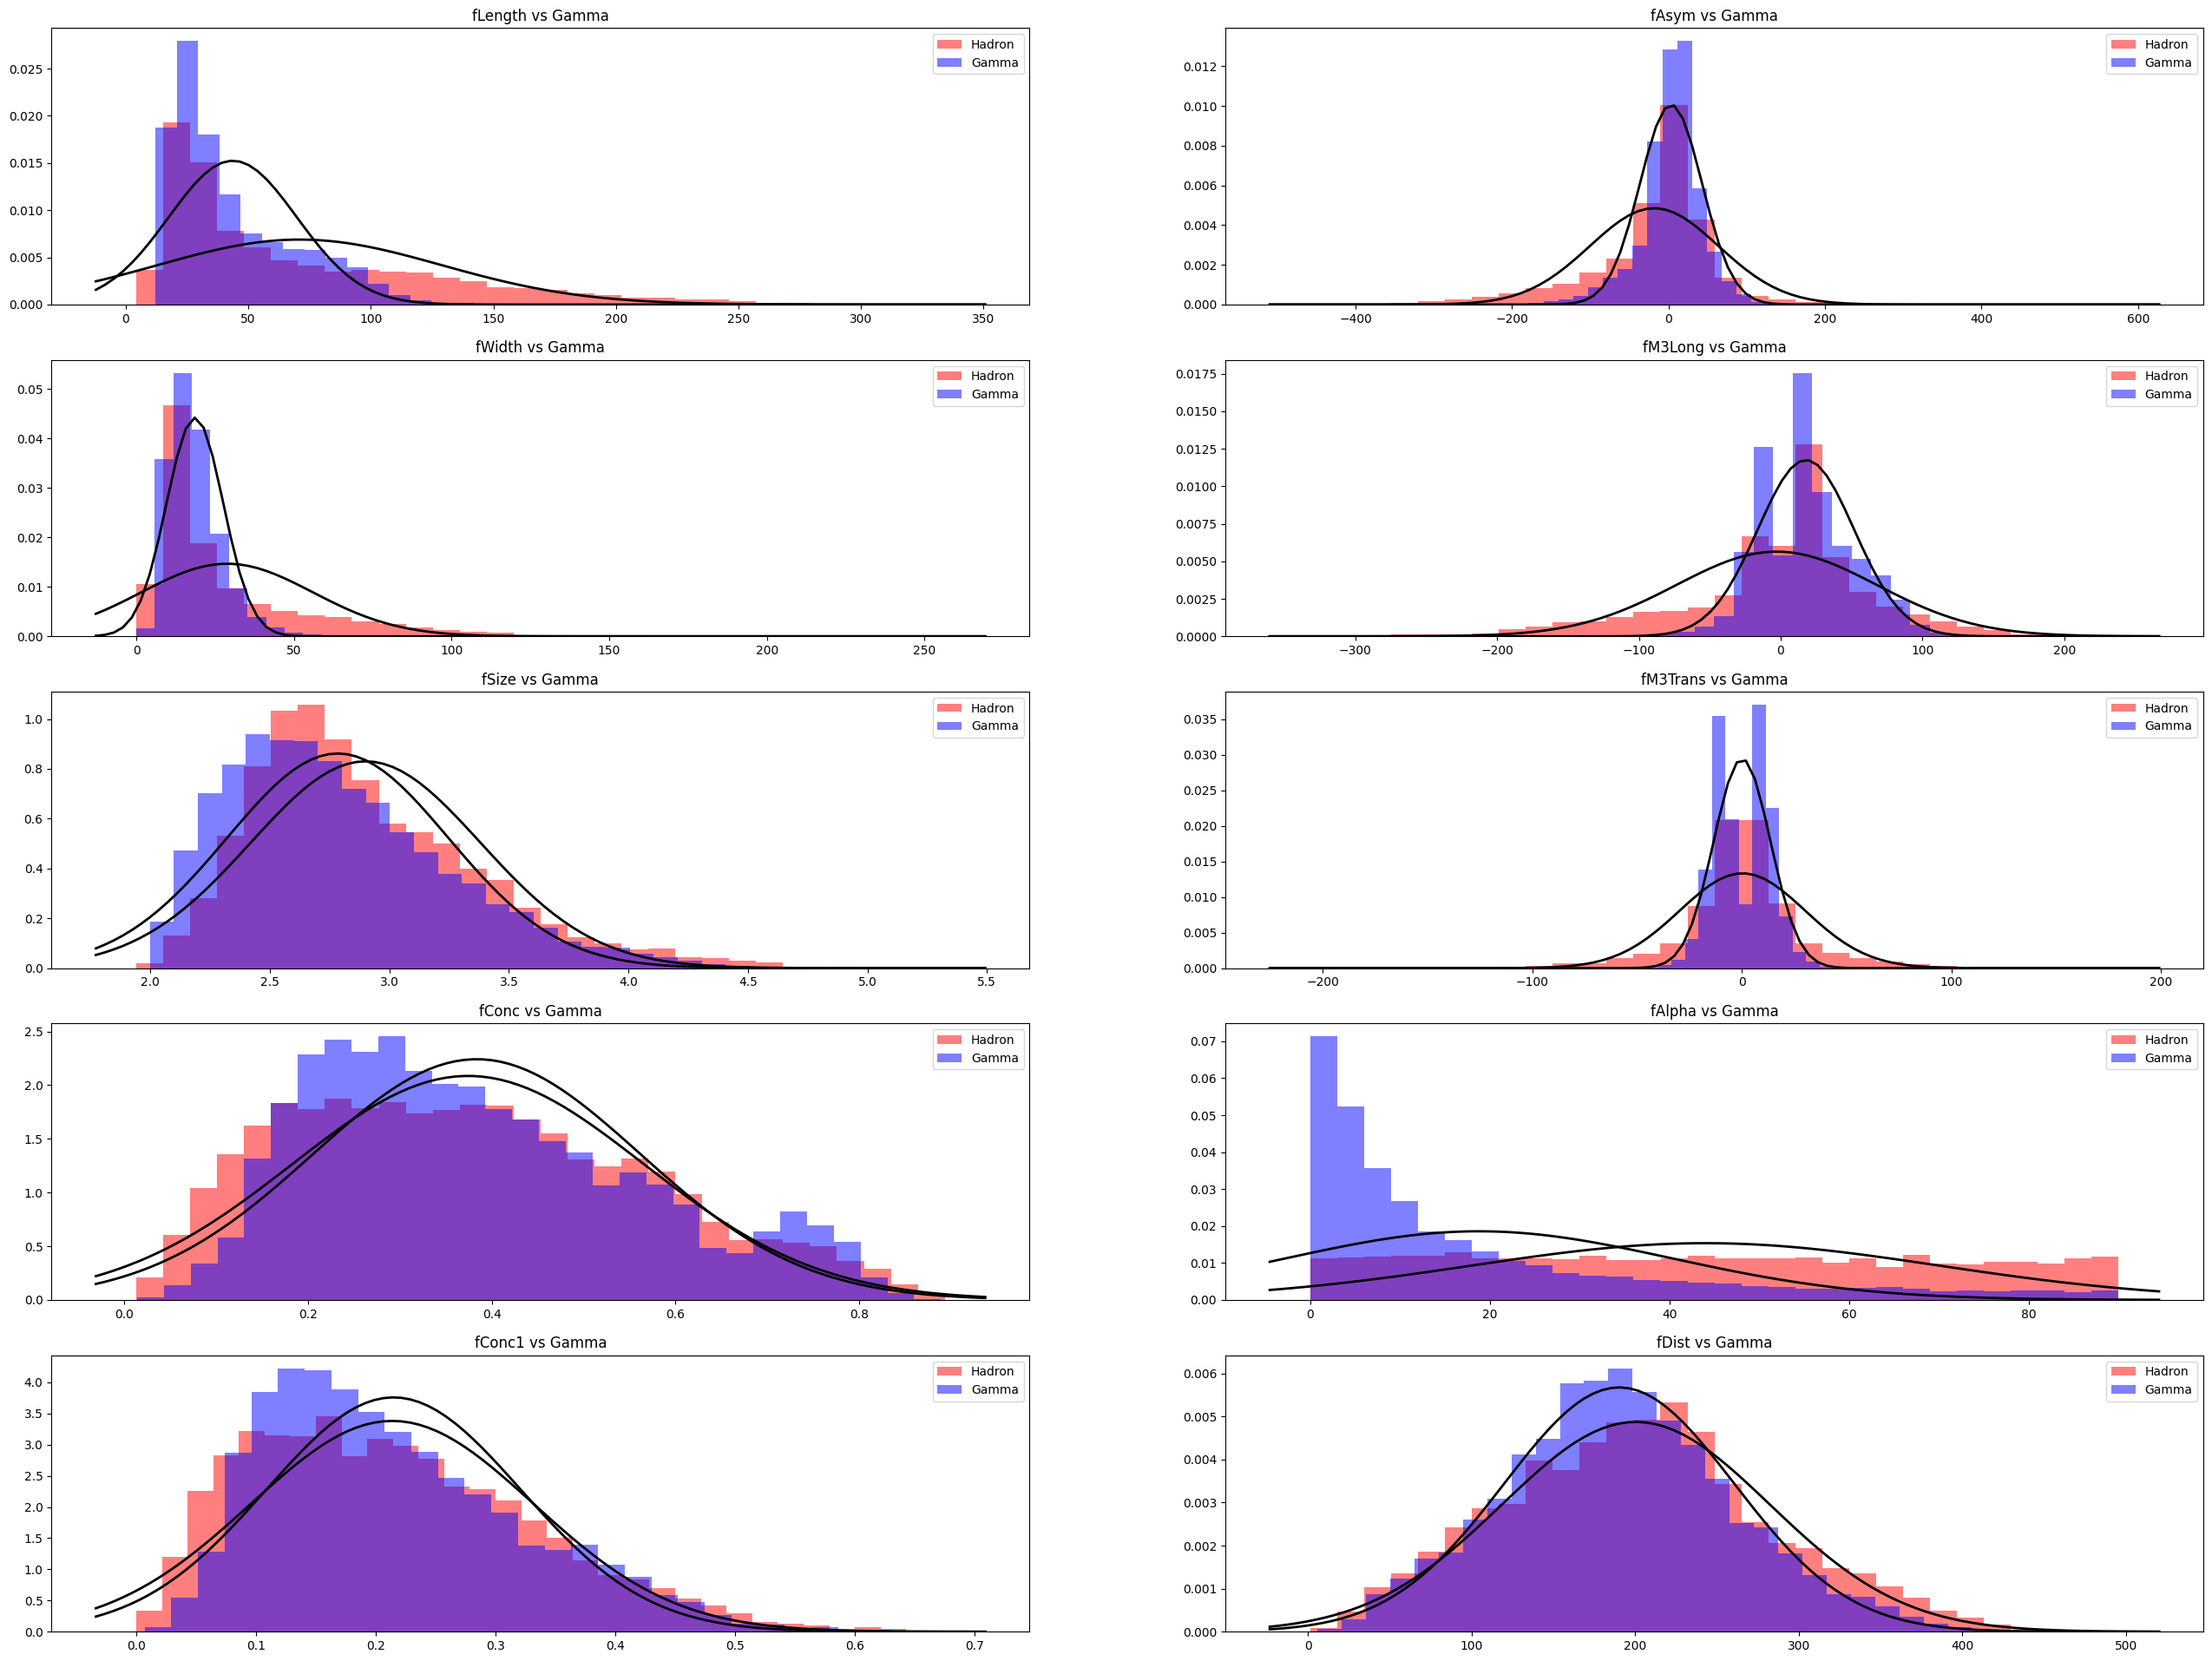

<Figure size 640x480 with 0 Axes>

In [17]:
row_len = 5
col_len = 2
row_idx = 0
col_idx = 0

fig,axs = plt.subplots(ncols = col_len , nrows = row_len,figsize = (32,24))


for target_column in numeric_features:
   
    mu_zero, std_zero = norm.fit(df_hadron[target_column])
    mu_one, std_one = norm.fit(df_gamma[target_column])
    
    axs[row_idx,col_idx].hist(df_hadron[target_column], bins=30, density=True, alpha=0.5, color='r', label='Hadron')
    axs[row_idx,col_idx].set_title(f'{target_column} vs Hadron')
    axs[row_idx,col_idx].legend()
    
    axs[row_idx,col_idx].hist(df_gamma[target_column], bins=30, density=True, alpha=0.5, color='b', label='Gamma')
    axs[row_idx,col_idx].set_title(f'{target_column} vs Gamma')
    axs[row_idx,col_idx].legend()
    
    xmin, xmax = axs[row_idx,col_idx].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p_0 = norm.pdf(x, mu_zero, std_zero)
    p_1 = norm.pdf(x, mu_one, std_one)
    axs[row_idx,col_idx].plot(x, p_0, 'k', linewidth=2)
    axs[row_idx,col_idx].plot(x, p_1, 'k', linewidth=2)
    row_idx += 1
    if(row_idx >= row_len):
        row_idx = 0 
        col_idx +=1
        if(col_idx >= col_len):
            break
            
plt.show()
plt.tight_layout()

While most positions in Gaussian distributions for different particle types might stay similar, the highest values and the shape of the distributions, like how they lean or how heavy their tails are, can be really important for telling particles apart. So, even if the averages look alike, these other details can help us figure out which particle is which.

#### Box Plot of Particle Features

Another important factor affecting model accuracy is the distribution of features. Data points that deviate significantly from the norm may result from faults in measurement devices, which can impact the model's accuracy. Therefore, it's important to examine the standard deviation of each numerical value.

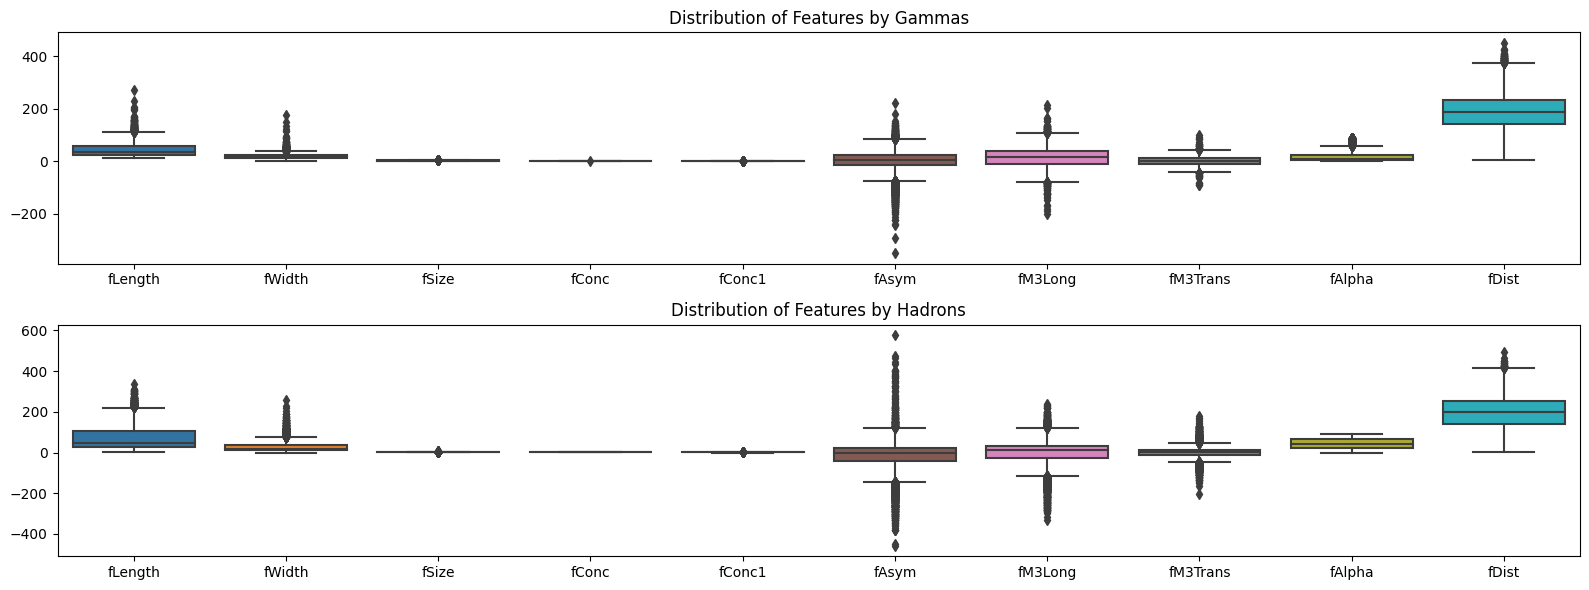

In [18]:
fig,axs = plt.subplots(2,1,figsize=(16,6))
axs[0].set_title('Distribution of Features by Gammas')
sns.boxplot(df_gamma[numeric_features],ax = axs[0])
axs[1].set_title('Distribution of Features by Hadrons')
sns.boxplot(df_hadron[numeric_features],ax = axs[1])
plt.tight_layout()

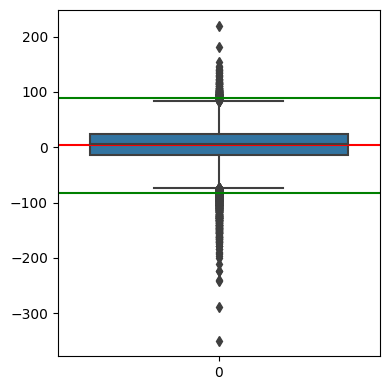

In [19]:
fig,axs = plt.subplots(1,figsize=(4,4))
sns.boxplot(df_gamma['fAsym'],ax = axs)

mu = df_gamma['fAsym'].mean()
std = df_gamma['fAsym'].std()
plt.axhline(mu,color = 'red')
plt.axhline(mu+(2.15*std),color = 'green')
plt.axhline(mu-(2.15*std),color = 'green')

plt.tight_layout()

As it seems there are many values which hav been deviated from the standard. We can later make different approach for these outliers by detecting boundary conditions, which shown in the figure above by mean(**Red line**) + (2.15 * std) (**Green Line**)

## Feature Engineering <a name="feature-engineering"></a>

### Detection of Outliers & Cleaning

**Note:** This part will be only applied to df_train, since the features are dependent on particle types. This will prevent data leakage

As observed in the previous section, some features exhibit deviations from the standard distribution. To assess the potential negative impact of these deviations on the model's predictions, we will remove the values that deviate from the standard and compare the results with the original data.

In [20]:
def detect_outliers(df,column):
    
    mean = df[column].mean()
    std = df[column].std()
    
    confidence_level = 2
    

    lower_bound = mean - (confidence_level) * std
    upper_bound = mean + (confidence_level) * std
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(column)
    print(f'There are, {len(outliers)} outliers for {column} feature')
  
    return outliers[column],cleaned[column]


In [21]:
indexes_to_drop = []
i_idx = 0
j_idx = 0
for column in numeric_features:
    
    for class_type in ['g','h']:
        outlier,cleaned = detect_outliers(df_train[df_train['class'] == class_type],column) 
        outlier_idx = outlier.index
    
        for idx in outlier.index:
        
            indexes_to_drop.append(idx)
            
print('\nNumber of rows before Removing Outliers',len(df))          
print('Number of rows after Removing Outliers',len(df)-len(set(indexes_to_drop)))
print('\nData loss',100 * len(set(indexes_to_drop))/len(df),"%")

fLength
There are, 405 outliers for fLength feature
fLength
There are, 261 outliers for fLength feature
fWidth
There are, 401 outliers for fWidth feature
fWidth
There are, 261 outliers for fWidth feature
fSize
There are, 376 outliers for fSize feature
fSize
There are, 212 outliers for fSize feature
fConc
There are, 396 outliers for fConc feature
fConc
There are, 152 outliers for fConc feature
fConc1
There are, 354 outliers for fConc1 feature
fConc1
There are, 180 outliers for fConc1 feature
fAsym
There are, 549 outliers for fAsym feature
fAsym
There are, 302 outliers for fAsym feature
fM3Long
There are, 379 outliers for fM3Long feature
fM3Long
There are, 305 outliers for fM3Long feature
fM3Trans
There are, 244 outliers for fM3Trans feature
fM3Trans
There are, 294 outliers for fM3Trans feature
fAlpha
There are, 649 outliers for fAlpha feature
fAlpha
There are, 0 outliers for fAlpha feature
fDist
There are, 433 outliers for fDist feature
fDist
There are, 194 outliers for fDist feature

N

With a data loss of 18% outliers have been removed from the train set to be compared with original train data in prediction models

In [22]:
df_train_outlier_cleaned = df_train.drop(indexes_to_drop)

df_train_hadron_cleaned = df_train_outlier_cleaned[df_train_outlier_cleaned['class'] == 'h']

df_train_gamma_cleaned = df_train_outlier_cleaned[df_train_outlier_cleaned['class'] == 'g']

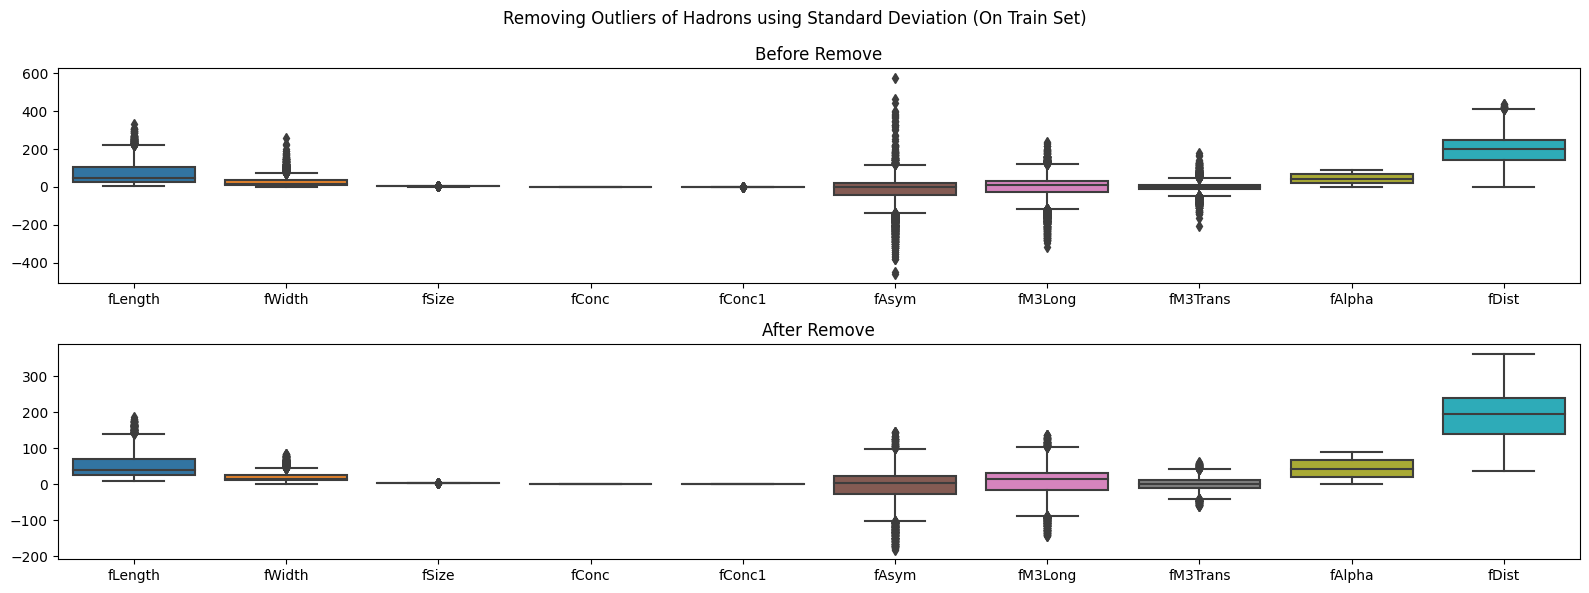

In [23]:
fig,axs = plt.subplots(2,1,figsize=(16,6))
fig.suptitle('Removing Outliers of Hadrons using Standard Deviation (On Train Set)')
axs[0].set_title('Before Remove')
sns.boxplot(df_train_hadron[numeric_features],ax = axs[0])
axs[1].set_title('After Remove')
sns.boxplot(df_train_hadron_cleaned[numeric_features],ax = axs[1])
plt.tight_layout()

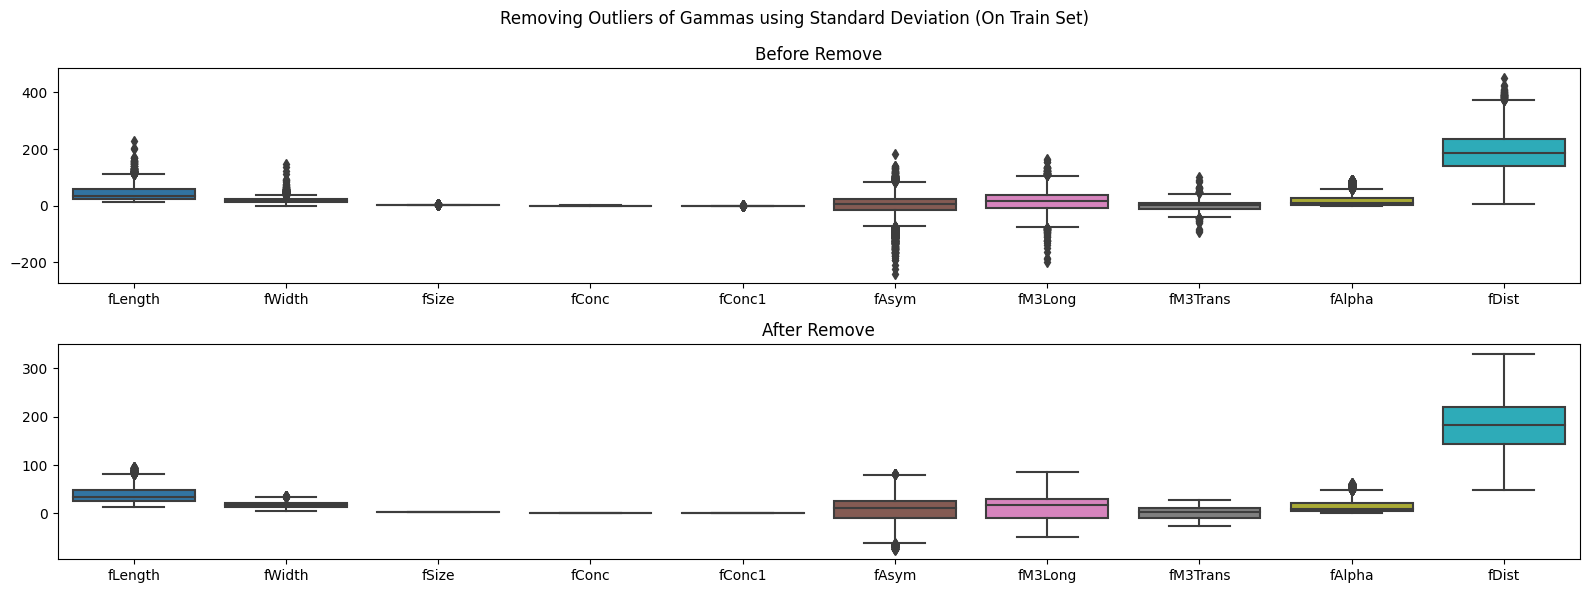

In [24]:
fig,axs = plt.subplots(2,1,figsize=(16,6))
fig.suptitle('Removing Outliers of Gammas using Standard Deviation (On Train Set)')
axs[0].set_title('Before Remove')
sns.boxplot(df_train_gamma[numeric_features],ax = axs[0])
axs[1].set_title('After Remove')
sns.boxplot(df_train_gamma_cleaned[numeric_features],ax = axs[1])
plt.tight_layout()

### Categorizing Features

Here it is aimed to instead of removing outliers, categorizing them by deviation in three categories (Extremely Low,Low, Medium, High, Extremely High)

However this part may be tricky because, in these conditions we calculate the mean and std of all the dataset. This may cause a data leakage problem. Therefore it is important to make categorization on training set again.

In [25]:
df_train_categorized = df_train

In [26]:
def categorize_outliers(df,column):
    
    mean = df[column].mean()
    std = df[column].std()
    
    confidence_level = 2.5
    
    lower_bound = mean - confidence_level * std
    upper_bound = mean + confidence_level * std
    
    bin_edges = [float("-inf"), lower_bound,mean-std, mean + std, upper_bound, float("inf")]
    
    df[f'{column}_label'] = pd.cut(df[column],bins = bin_edges ,labels = ['Extremely Low','Low','Medium','High','Extremely High'])
    return df 

In [27]:
i_idx = 0
j_idx = 0

for column in numeric_features:

    gamma_train_categorized = categorize_outliers(df_train_gamma,column) 
    hadron_train_categorized = categorize_outliers(df_train_hadron,column) 

In [28]:
df_train = pd.concat((gamma_train_categorized,hadron_train_categorized),axis=0)

In [29]:
categorized_labels = [(row+'_label') for row in numeric_features]

In [30]:
categorized_labels 

['fLength_label',
 'fWidth_label',
 'fSize_label',
 'fConc_label',
 'fConc1_label',
 'fAsym_label',
 'fM3Long_label',
 'fM3Trans_label',
 'fAlpha_label',
 'fDist_label']

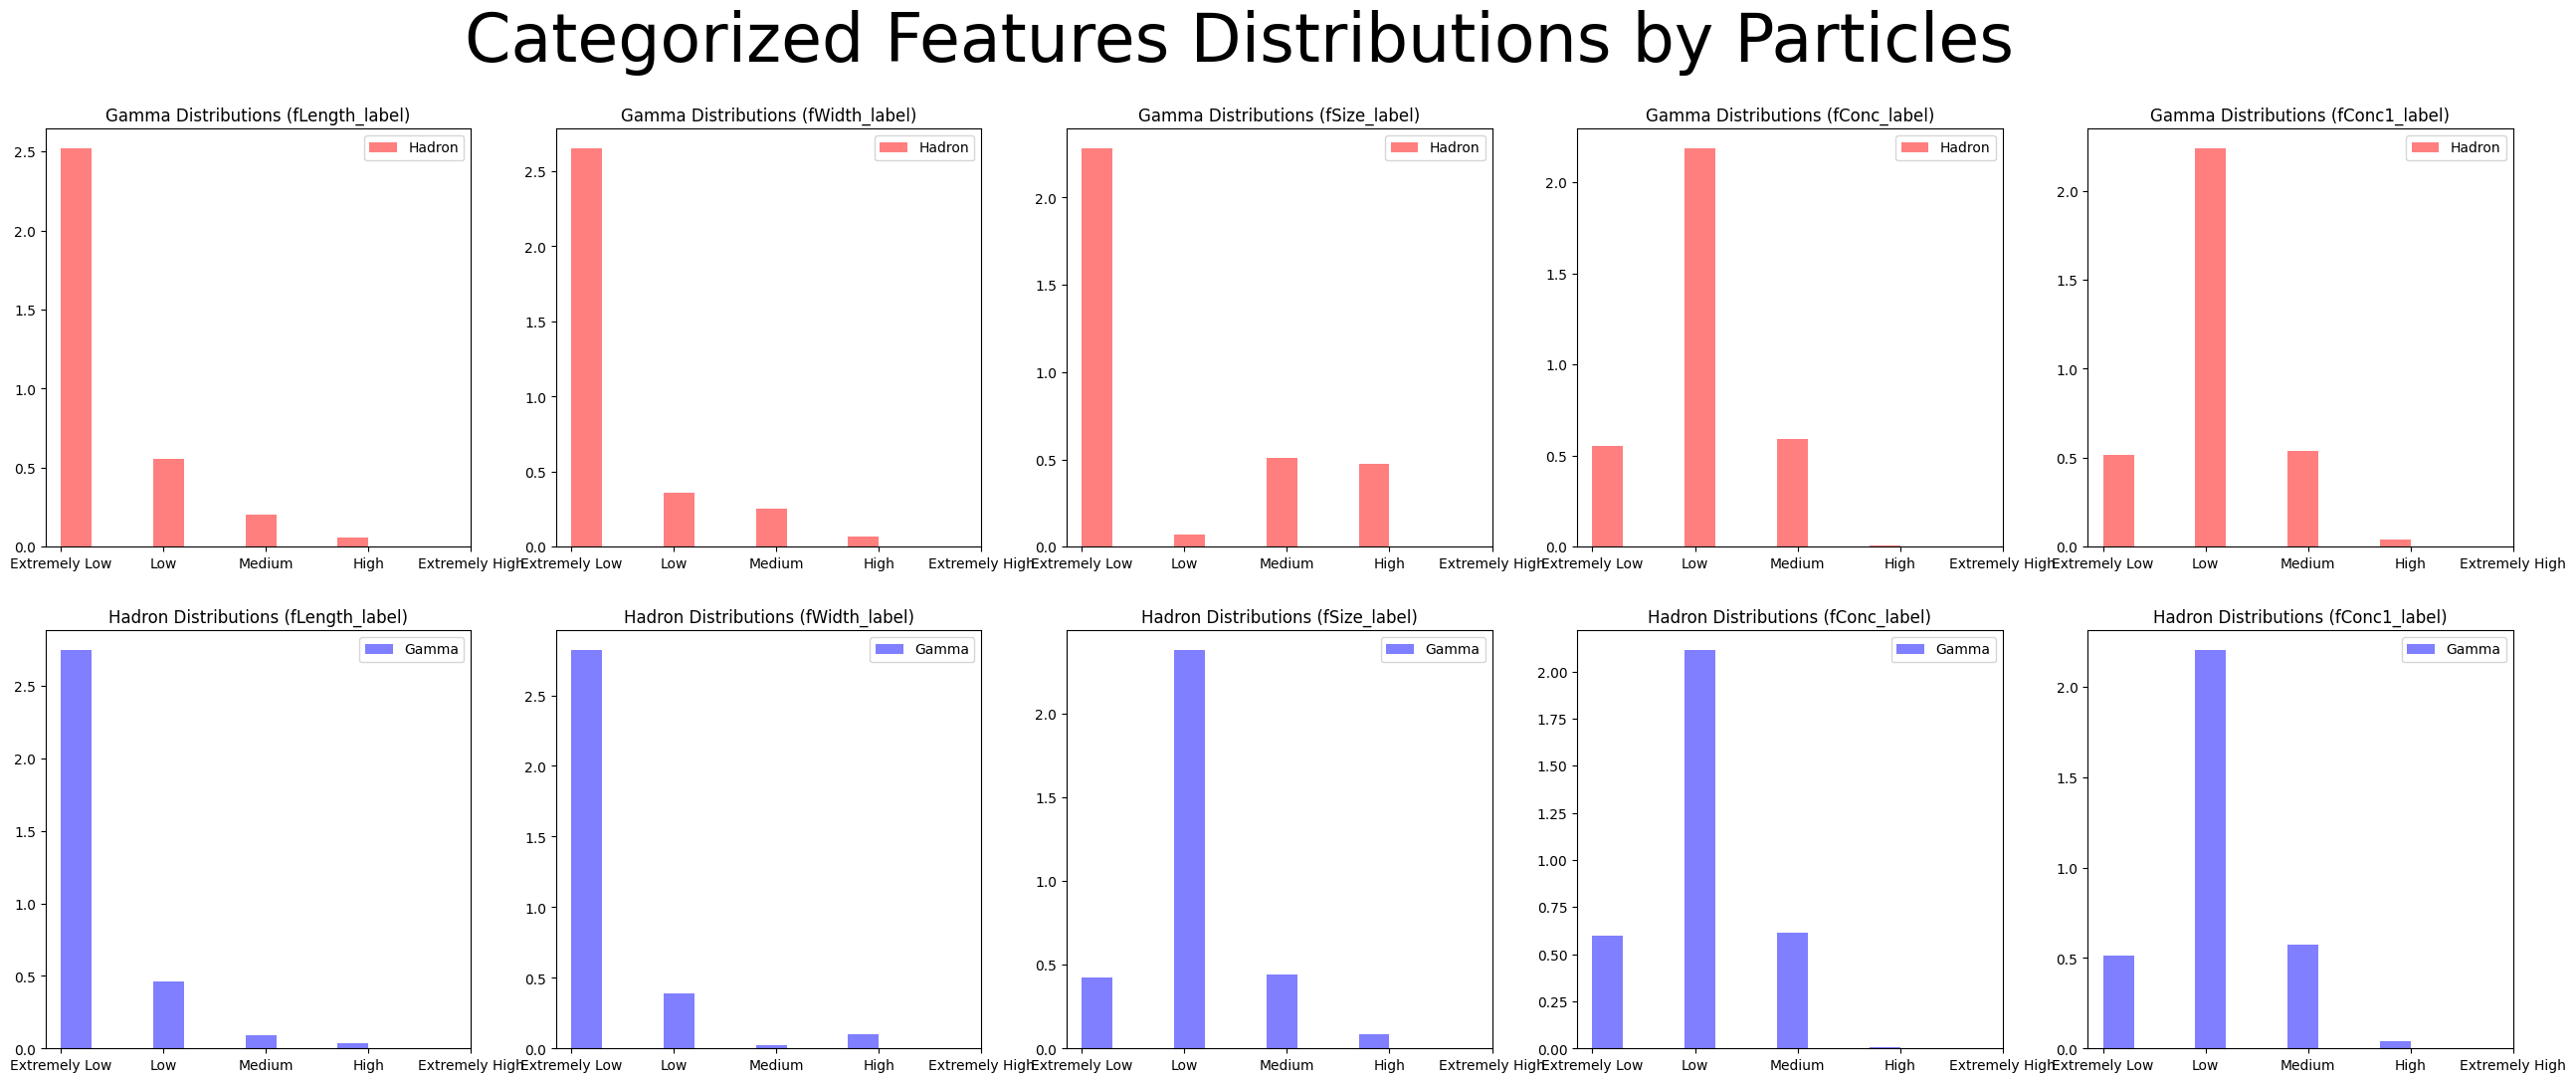

<Figure size 640x480 with 0 Axes>

In [31]:
row_len = 2
col_len = 5
row_idx = 0
col_idx = 0

fig,axs = plt.subplots(ncols = col_len , nrows = row_len,figsize = (32,12))

for target_column in categorized_labels:
  
    axs[0,col_idx].set_title(f'Gamma Distributions ({target_column})')
    axs[0,col_idx].hist(gamma_train_categorized[target_column], bins=10, density=True, alpha=0.5, color='r', label='Hadron')
    


    axs[0,col_idx].legend()
    
    axs[1,col_idx].set_title(f'Hadron Distributions ({target_column})')
    
    axs[1,col_idx].hist(hadron_train_categorized[target_column], bins=10, density=True, alpha=0.5, color='b', label='Gamma')
    axs[1,col_idx].legend()

    axs[0,col_idx].set_xticks(range(len(np.unique(gamma_train_categorized[categorized_labels]))),['Extremely Low','Low','Medium','High','Extremely High'])         
    axs[1,col_idx].set_xticks(range(len(np.unique(hadron_train_categorized[categorized_labels]))),['Extremely Low','Low','Medium','High','Extremely High'])   
  
    col_idx +=1
    if(col_idx >= col_len):
        break
        
plt.suptitle("Categorized Features Distributions by Particles",fontsize=48)       
plt.show()
plt.tight_layout()

Hadron and Gamma features differs when they are categorized by their size,width,concavities etc.

**fSize** has a noticable differences in two particles.

Now time to arrange features for test dataset. Since we do not know which particle is hadron or gamma in test set. It is not possible to categorize them. We can only categorize them by looking all numeric features of dataset instead of dividing by different particle classes.

In [32]:
indexes_to_drop = []
i_idx = 0
j_idx = 0

for column in numeric_features:
    train_categorized = categorize_outliers(df_train,column)
    test_categorized = categorize_outliers(df_test,column)
    valid_categorized = categorize_outliers(df_valid,column) 

In [33]:
df_train = train_categorized
df_test = test_categorized
df_valid = valid_categorized

### Train, Validation,Test Set, One-Hot Encoding, Scaling

In [34]:
from sklearn.preprocessing import OrdinalEncoder

**Note:** Since categorized features are dependent on particles' shape, size etc. These can be encoded ordinally instead of one-hot encoding

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features].values)
df_valid[numeric_features] = scaler.fit_transform(df_valid[numeric_features].values)
df_test[numeric_features] = scaler.fit_transform(df_test[numeric_features].values)

encoder = OrdinalEncoder()
df_train[categorized_labels] = encoder.fit_transform(df_train[categorized_labels])
df_valid[categorized_labels] = encoder.fit_transform(df_valid[categorized_labels])
df_test[categorized_labels] = encoder.fit_transform(df_test[categorized_labels])


used_labels = numeric_features + categorized_labels

X_train = df_train[used_labels]
X_valid = df_valid[used_labels]
X_test  = df_test[used_labels]

y_train = df_train['class_mapped'].astype('uint8').values
y_valid = df_valid['class_mapped'].astype('uint8').values
y_test = df_test['class_mapped'].astype('uint8').values

## Model Selection  <a name="comparison-of-machine-learning-algorithms"></a>

In this section, we compared the accuracy predictions of classification models before and after the feature engineering process to test its effectiveness.

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [38]:
_roc_curves = {"Catboost": [],"SVM" :[],"GaussianNB":[]}
_auc_scores = {"Catboost": [],"SVM" :[],"GaussianNB":[]}

#### Catboost Classifier (Tree-Based Approach)

<div align="center">
    <img src="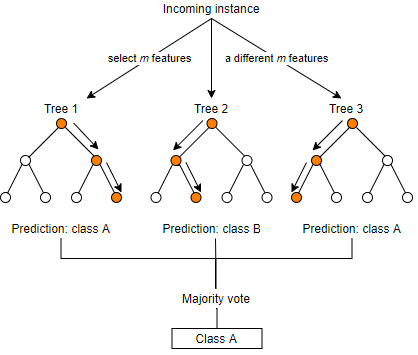
" alt="Catboost" width="225" height="225">
</div>

One advantage of CatBoost over other tree-based approaches is its gradient-based approach to minimizing errors, which aims to reduce bias by focusing on weak distributions in a sequence through categorical boosting. This allows CatBoost to extract sub-patterns from these distributions, ultimately targeting low bias. It makes boosting a it prior method while recognizing patterns  which is shower image pattern in this project.

In [39]:
from catboost import CatBoostClassifier

In [40]:
model = CatBoostClassifier(iterations=100,
                           depth=3,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=False)

In [41]:
# train the model
model.fit(X_train, y_train)

In [42]:
# make the prediction using the resulting model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2448
           1       0.82      0.78      0.80      1356

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



<AxesSubplot: >

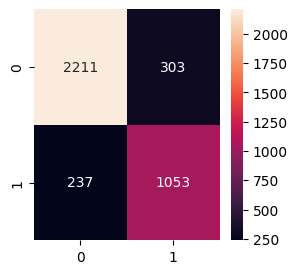

In [44]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True, fmt = '0.0f')

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
_auc_scores['Catboost'].append(auc)
_roc_curves['Catboost'].append((fpr,tpr))

#### SVM (Support Vector Machine)

<div align="center">
    <img src="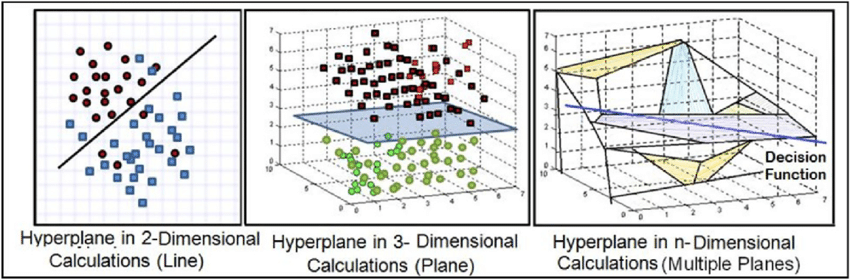
" alt="SVM" width="500" height="500">
</div>

In this project, using Support Vector Machine (SVM) could be reasonable because even though there may not be a distinguishable correlation between the 7 different numerical features in 2 dimensions, this lack of correlation might be misleading. By working in a 7-dimensional space, SVM can potentially create multiple hyperplanes to separate the particles more accurately. However, visualizing this separation in 7 dimensions is not feasible.

In [46]:
from sklearn.svm import SVC

In [47]:
svm_model = SVC(probability = True)
svm_model = svm_model.fit(X_train, y_train)

In [48]:
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:,1]

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2448
           1       0.89      0.67      0.77      1356

    accuracy                           0.85      3804
   macro avg       0.87      0.81      0.83      3804
weighted avg       0.86      0.85      0.85      3804



<AxesSubplot: >

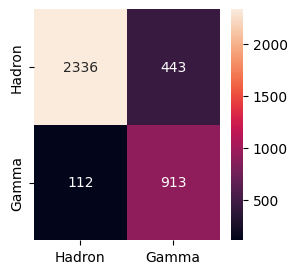

In [50]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred,y_test), xticklabels=["Hadron","Gamma"], yticklabels=["Hadron","Gamma"], annot = True, fmt = '0.0f')

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
_auc_scores['SVM'].append(auc)
_roc_curves['SVM'].append((fpr,tpr))

### Gaussian Naive Bayes

<div align="center">
    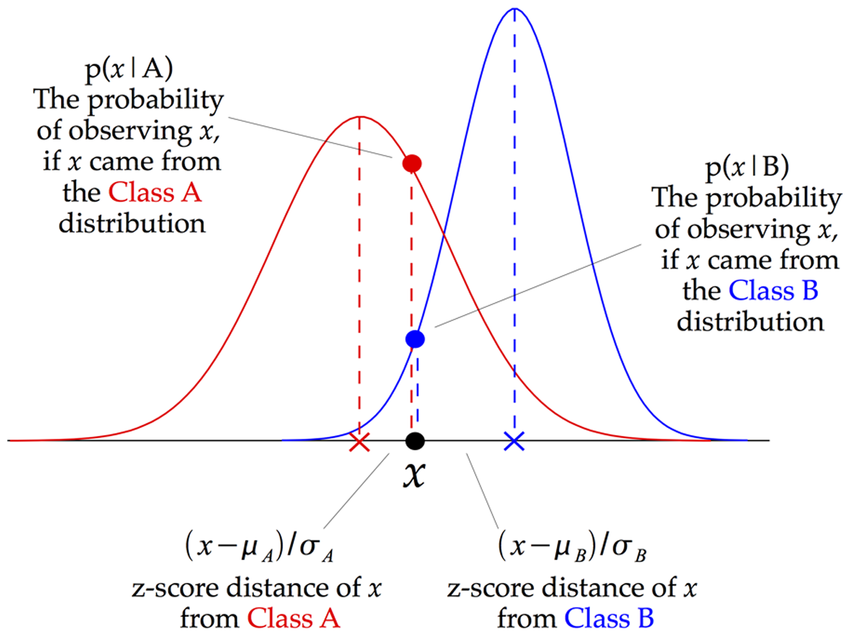
</div>

The Naive Bayes algorithm determines a probability by considering whether Gaussian distributions can distinguish from each other. The resulting probability is then rounded to the nearest class to identify particles. However, this model may not be useful, since non-Gaussian distribution and the closeness of the particles distributions to each other.

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gaussian_model = GaussianNB()
gaussian_model = gaussian_model.fit(X_train, y_train)

In [54]:
y_pred = gaussian_model.predict(X_test)
y_pred_proba = gaussian_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      2448
           1       0.63      0.36      0.46      1356

    accuracy                           0.70      3804
   macro avg       0.67      0.62      0.63      3804
weighted avg       0.69      0.70      0.67      3804



<AxesSubplot: >

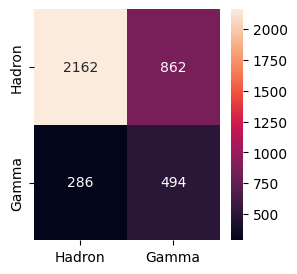

In [55]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred,y_test), xticklabels=["Hadron","Gamma"], yticklabels=["Hadron","Gamma"], annot = True, fmt = '0.0f')

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
_auc_scores['GaussianNB'].append(auc)
_roc_curves['GaussianNB'].append((fpr,tpr))

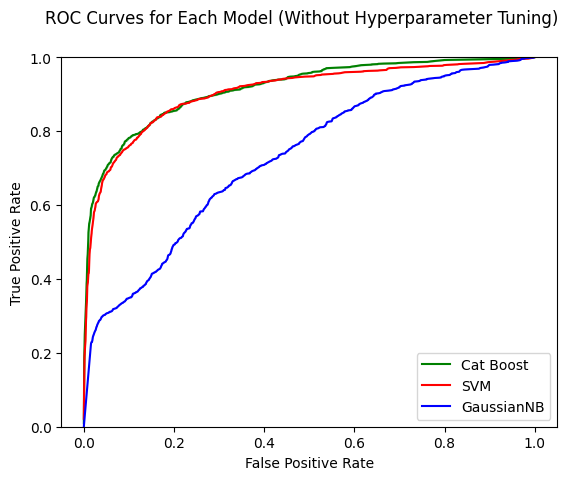

In [57]:
plt.ylim(0,1)
plt.suptitle('ROC Curves for Each Model (Without Hyperparameter Tuning)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
sns.lineplot(x = _roc_curves['Catboost'][0][0],y = _roc_curves['Catboost'][0][1],label = 'Cat Boost',c ='g')
sns.lineplot(x = _roc_curves['SVM'][0][0],y = _roc_curves['SVM'][0][1],label = 'SVM',c ='r')
sns.lineplot(x = _roc_curves['GaussianNB'][0][0],y = _roc_curves['GaussianNB'][0][1],label = 'GaussianNB',c = 'b')
plt.legend()
plt.show()

### Using Neural Networks

<div align="center">
    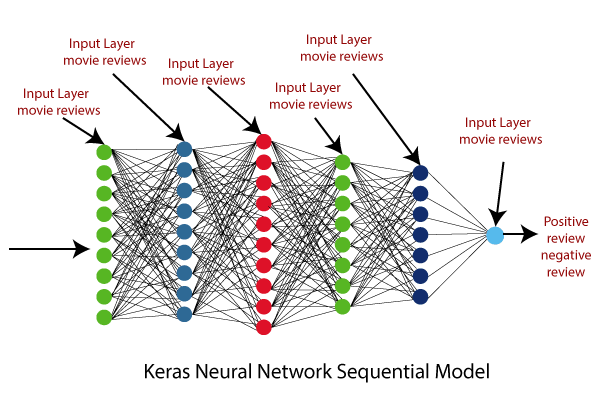
</div>

A neural network is a computational model inspired by the human nervous system, which uses interconnected neurons to mimic and predict complex patterns and relationships in data.

The Keras Sequential model is a linear stack of layers used to build neural network models in Keras.

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim

In [59]:
X_train.shape

(13314, 20)

In [60]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size= 50,
                    epochs = 100,
                    validation_data=(X_valid,y_valid),verbose = 1)

Epoch 1/100


267/267 [==============================] - 3s 5ms/step - loss: 0.4812 - accuracy: 0.7903 - val_loss: 0.3597 - val_accuracy: 0.8454
Epoch 2/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3825 - accuracy: 0.8353 - val_loss: 0.3377 - val_accuracy: 0.8617
Epoch 3/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.8462 - val_loss: 0.3204 - val_accuracy: 0.8743
Epoch 4/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8510 - val_loss: 0.3122 - val_accuracy: 0.8764
Epoch 5/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8558 - val_loss: 0.2992 - val_accuracy: 0.8833
Epoch 6/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.8592 - val_loss: 0.3145 - val_accuracy: 0.8796
Epoch 7/100
267/267 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.8608 - val_loss: 0.2975 - val_accuracy: 0.87

In [62]:
y_pred = model.predict(X_test)

119/119 [==============================] - 0s 2ms/step


In [63]:
y_pred_max = np.argmax(y_pred , axis=1)

<AxesSubplot: >

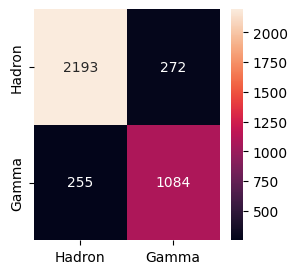

In [64]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred_max,y_test), xticklabels=["Hadron","Gamma"], yticklabels=["Hadron","Gamma"], annot = True, fmt = '0.0f')

In [65]:
print(classification_report(y_test, y_pred_max))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2448
           1       0.81      0.80      0.80      1356

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Using Support Vector Machines with removed outliers dataset

In [66]:
scaler = StandardScaler()

df_train_outlier_cleaned[numeric_features] = scaler.fit_transform(df_train_outlier_cleaned[numeric_features].values)

X_train_outlier_cleaned = pd.get_dummies(df_train_outlier_cleaned[numeric_features])

y_train_outlier_cleaned = df_train_outlier_cleaned['class_mapped'].astype('uint8').values


In [67]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_outlier_cleaned , y_train_outlier_cleaned)

In [68]:
y_pred = svm_model.predict(X_test[numeric_features])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2448
           1       0.82      0.64      0.72      1356

    accuracy                           0.82      3804
   macro avg       0.82      0.78      0.79      3804
weighted avg       0.82      0.82      0.82      3804



**Result:** 

Based on the observations:

1. The impact of removing outliers is mixed, sometimes increasing and sometimes decreasing model performance. 
<br/>

2. Categorizing particles based on their size, concavity, length, etc., slightly improves accuracy but not too much.
<br/>

3. Support Vector Machines (SVM) and neural networks perform well, with CatBoost classifiers closely following. However, Gaussian Naive Bayes has the worst accuracy and is not suitable for this specific classification problem.


## Hyperparameter Tuning   <a name ="hyperparameter-tuning"> </a>

Hyperparameter tuning is a crucial step in machine learning that comes after feature engineering and algorithm selection. It involves adjusting the parameters (hyperparameters) of an algorithm to achieve the best performance on a validation set, which can significantly impact the accuracy of the model. Rather than trying each parameter individually, a dictionary containing the hyperparameters is prepared, and combinations yielding the best results are obtained using loop conditions. The model is then refitted with these tuned hyperparameters and evaluated on the test set to ensure its effectiveness.

Since the comparison of the three models we discussed clearly showed that the Support Vector Machine yielded the best results, we have decided to perform hyperparameter tuning for this model.

### Hyperparameter tuning on Support Vector Machines

In [69]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [70]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C of the error term
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}


model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


In [71]:
best_rf = grid_search.best_estimator_

In [72]:
y_pred = best_rf.predict(X_test)

In [73]:
result_svm = classification_report(y_test, y_pred)

In [74]:
print(result_svm)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2448
           1       0.86      0.72      0.79      1356

    accuracy                           0.86      3804
   macro avg       0.86      0.83      0.84      3804
weighted avg       0.86      0.86      0.86      3804



<AxesSubplot: >

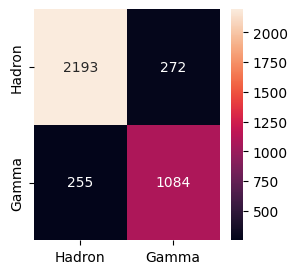

In [75]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred_max,y_test), xticklabels=["Hadron","Gamma"], yticklabels=["Hadron","Gamma"], annot = True, fmt = '0.0f')

### Hyperparameter tuning on Neural Networks

In [76]:
!pip install -q keras-tuner --upgrade

In [77]:
import keras_tuner
import keras
from keras import layers

In [78]:
def build_model(hp):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
    ])

    model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
    return model



In [79]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
)

In [80]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
best_model = tuner.get_best_models()[0]

Trial 1 Complete [00h 00m 21s]
val_accuracy: 0.8654048442840576

Best val_accuracy So Far: 0.8654048442840576
Total elapsed time: 00h 00m 21s


In [81]:
best_model.fit(X_train,y_train)

417/417 [==============================] - 3s 3ms/step - loss: 0.3929 - accuracy: 0.8435


In [82]:
y_pred = best_model.predict(X_test)

119/119 [==============================] - 0s 3ms/step


In [83]:
y_pred_max = np.argmax(y_pred, axis=1)

In [84]:
result_nn = classification_report(y_pred_max,y_test)

In [85]:
print(result_nn)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2701
           1       0.70      0.87      0.78      1103

    accuracy                           0.86      3804
   macro avg       0.82      0.86      0.84      3804
weighted avg       0.87      0.86      0.86      3804



<AxesSubplot: >

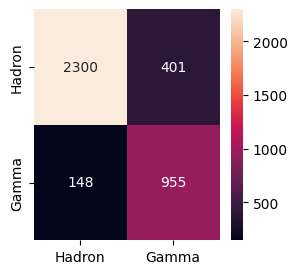

In [86]:
fig,axs = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix(y_pred_max,y_test), xticklabels=["Hadron","Gamma"], yticklabels=["Hadron","Gamma"], annot = True, fmt = '0.0f')

## Conclusion   <a name ="conclusion"> </a>

In this project, we used data obtained from Monte Carlo simulations based on Cherenkov telescope data with four different prediction models: Gaussian Naive Bayes, Support Vector Machines, Catboost Classifier, and Sequential Neural Networks. While Support Vector Machines and Neural Networks achieved high scores, Gaussian Naive Bayes yielded the lowest score among the algorithms. Additionally, we conducted hyperparameter testing on the two highest-scoring algorithms to improve model accuracy, but the increase was not significant. Removing outliers significantly decreased data prediction, while classifying outliers had a slightly positive or neutral impact on the prediction algorithm. 

Here is the top 2 results first in Neural Networks, second in Support Vector Machines:

**Support Vector Machine**

In [87]:
print(result_svm)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2448
           1       0.86      0.72      0.79      1356

    accuracy                           0.86      3804
   macro avg       0.86      0.83      0.84      3804
weighted avg       0.86      0.86      0.86      3804



**Neural Network**

In [88]:
print(result_nn)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2701
           1       0.70      0.87      0.78      1103

    accuracy                           0.86      3804
   macro avg       0.82      0.86      0.84      3804
weighted avg       0.87      0.86      0.86      3804

